In [1]:
%matplotlib inline
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Plot the decision surface of a decision tree on the iris dataset


Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.


In [25]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Load data
cancer = load_breast_cancer()
columns = np.append(cancer.feature_names, 'target');   
index = pd.RangeIndex(start=0, stop=569, step=1);
data = np.column_stack((cancer.data, cancer.target))
cancer_df = pd.DataFrame(data=data, index=index, columns=columns)

M = cancer_df[cancer_df['target'] == 0.0]
B = cancer_df[cancer_df['target'] == 1.0]
malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.mean()
benign_mean = benign.mean()
analysis_point = (malignant_mean+benign_mean)/2
analysis_point.head()

Automatically created module for IPython interactive environment


mean radius         14.804677
mean texture        19.759834
mean perimeter      96.720392
mean area          720.583306
mean smoothness      0.097688
dtype: float64

In [3]:
X_plot = cancer_df.drop('target', axis=1)
y_plot = cancer_df.get('target')
# Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_plot, y_plot, test_size=0.2, stratify=cancer_df.target, random_state=0)

In [4]:
# Baseline checking
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=5,random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.mean()
benign_mean = benign.mean()
analysis_point = (malignant_mean+benign_mean)/2

analysis_point_df = (pd.DataFrame(analysis_point)).T
analysis_point_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486


In [28]:
ap_df_t = analysis_point_df
ap_df = pd.concat([ap_df_t]*455,ignore_index=True)
ap_df.head(-1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
1,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
2,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
3,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
4,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
450,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
451,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
452,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486


In [38]:
for i, t in zip(X_train.columns, tree_clf.feature_importances_):
    print(i,t)

mean radius 0.0
mean texture 0.04216249186250418
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.006404429143671521
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0
texture error 0.0
perimeter error 0.0
area error 0.04419545482965055
smoothness error 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.012351399062795075
worst radius 0.0
worst texture 0.025217439753206616
worst perimeter 0.0
worst area 0.11862464611942723
worst smoothness 0.008405813251068872
worst compactness 0.0
worst concavity 0.0
worst concave points 0.742638325977676
worst symmetry 0.0
worst fractal dimension 0.0


In [39]:
list1 = ["worst concave points","worst area","area error","mean texture","fractal dimension error"]

In [40]:
def train_vec(df, ap_df, feature_1, feature_2):
    X_train_plot = ap_df.copy()
    rr = len(X_train_plot.index)
    a = df[feature_1].to_numpy()
    b = df[feature_2].to_numpy()
    for col in df.columns:
        #a = df[col].to_numpy
        #df1.at[i, col]= a
        #print(type(a))
        #print(type(col))
        if col == feature_1:
            for i in range(0,rr):
            #X_train_plot[col]= a
                X_train_plot.at[i, col]= a[i]
        if col == feature_2:
            for i in range(0,rr):
                X_train_plot.at[i, col]= b[i]
         #   X_train_plot[col]= df[col].copy()
    return X_train_plot

In [54]:
def make_meshgrid3(X_train_plot, df,ap_df_t, h,feature_1, feature_2):
    bound1 = X_train_plot[feature_1].mean()
    bound2 = X_train_plot[feature_2].mean()
    df1 = pd.DataFrame(columns = df.columns)
    x_min, x_max = df[feature_1].min() - 0.09, df[feature_1].max() + 0.39
    y_min, y_max = df[feature_2].min() - 0.09, df[feature_2].max() + 0.39
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    a = xx.ravel()
    b = yy.ravel()
    df1 ["worst concave points"] = a
    df1 = pd.concat([ap_df_t]*len(a),ignore_index=True)
    #b22 = len(a)
    #myrange = list(range(0,b22))
    for col in X_train_plot.columns:
        #a1 = X_train_plot[col].to_numpy()
        #if col != feature_1 and col != feature_2:
         #   a1 = X_train_plot[col].to_numpy()
          #  for i, a1 in zip(range(0,len(a)) , a1):
           #     df1.at[i, col]= a1
            #df1[col] = a1
            
        if col == feature_1:
            for i, a in zip(range(0,len(a)) , a):
                df1.at[i, col]= a
                
        if col == feature_2:  
            for i, b in zip(range(0,len(b)) , b):
                df1.at[i, col]= b
                #df1 = df1.append({col : b }, ignore_index=False)
        
        
    
    return df1, xx, yy

In [55]:
from itertools import combinations
list = [1, 2, 3, 4]
for combo in combinations(list1, 2):  # 2 for pairs, 3 for triplets, etc
    a = combo[0]
    b = combo[1]
    print (a, b)
    

worst concave points worst area
worst concave points area error
worst concave points mean texture
worst concave points fractal dimension error
worst area area error
worst area mean texture
worst area fractal dimension error
area error mean texture
area error fractal dimension error
mean texture fractal dimension error


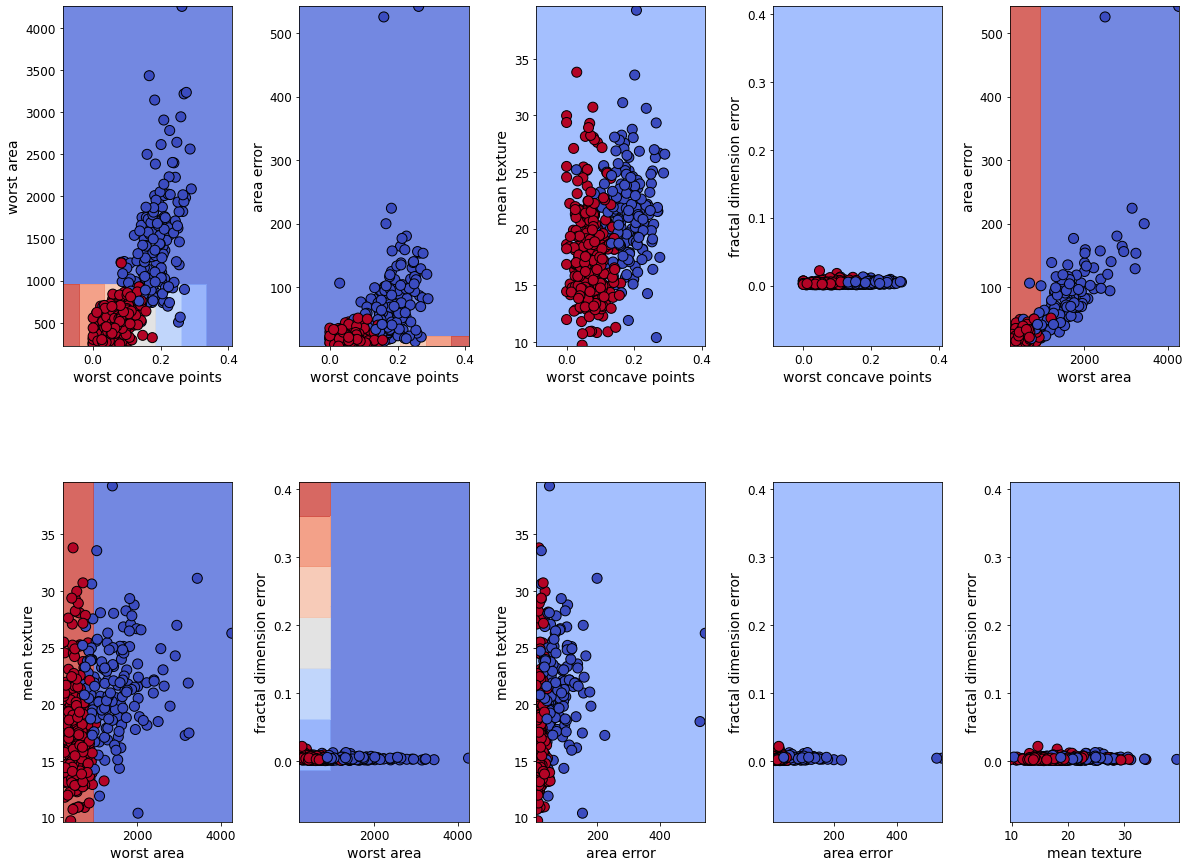

In [57]:
fig, sub = plt.subplots(2,5, figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for combo, ax in zip(combinations(list1, 2), sub.flatten()):
    a = combo[0]
    b = combo[1]
    X_train_plot = train_vec(X_train, ap_df, a, b)
    X_train_plot_ready, xx, yy = make_meshgrid3(X_train_plot, X_train,ap_df_t, 0.5,a , b)
    X0 = X_train_plot[a]
    X1 = X_train_plot[b]
    #print(X_train_plot_ready.head(-1))
    #print("\n")
    Z = tree_clf.predict(X_train_plot_ready)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    #ax.set_xticks(())
    #ax.set_yticks(())  
    #plot(ap_df,analysis_point_df, X_train, 0.8, y_train, "combo[0]", "combo[0]")
plt.show()


In [ ]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.01

#X_plot = cancer_df.drop('target', axis=1)
#y_plot = cancer_df.get('target')

plt.figure(figsize=(25,8))
indexs=[27,23,13,19,21]
pairs = [[27,23], [27,13], [27,21],[27,19],[23,13], [23,21], [23,19],[21,19], [21,13], [19,13]]
    #pair = [27,23]
count=0
for pair in pairs:
    #pair=[19,23]
    #print(pair)
    # We only take the two corresponding features
    X_p = cancer.data[:, pair]
    y_p = cancer.target
    # Plot the decision boundary
    plt.subplot(2, 5, count+1)
    count = count+1
    x_min, x_max = X_p[:, 0].min() * 0.7, X_p[:, 0].max() * 1.3
    y_min, y_max = X_p[:, 1].min() * 0.7, X_p[:, 1].max() * 1.3
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    #print(xx)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    rows=xx.shape[0]*xx.shape[1]
    array = np.ones([xx.shape[0]*xx.shape[1],30]) 
    #print(array)
    array_ap = np.array(analysis_point)
    array = array * array_ap
    #print(array)
        #ap_df_t = analysis_point_df.T
        #array_df = pd.concat([ap_df_t]*rows,ignore_index=True)
        
    array_df = pd.DataFrame(array)
    #print(array_df)
    array_df[pair[0]]=xx.ravel()
    #print(array_df)
    array_df[pair[1]]=yy.ravel()
    #cancer_df=cancer_df.drop(columns='target')
    #print(cancer_df)
    cancer_array=array_df.values
    
    Z = tree_clf.predict(cancer_array)
    
    
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_p == i)
        plt.scatter(X_p[idx, 0], X_p[idx, 1], c=color, label=cancer.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=10)

        
        
    
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.title(cancer.feature_names[pair[0]] + ' vs ' + cancer.feature_names[pair[1]])
    #plt.figure()
    plt.tight_layout()

plt.show()

In [23]:
print(rows)

152


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (10802, 1)

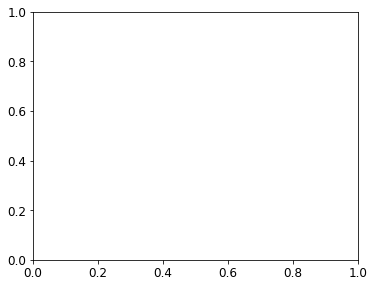

In [14]:
plt.figure(figsize=(15,8))
#for pairidx, pair in enumerate([[23,13]]):
    # We only take the two corresponding features
X = cancer.data[:, pair]
y = cancer.target
   
    # Plot the decision boundary
plt.subplot(2, 3, pairidx + 1)

x_min, x_max = X[:, 0].min() * 0.7, X[:, 0].max() * 1.3
y_min, y_max = X[:, 1].min() * 0.7, X[:, 1].max() * 1.3
   
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
    #print(xx)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

rows=xx.shape[0]*xx.shape[1]
array = np.ones([xx.shape[0]*xx.shape[1],30]) 
#print(array)
array_ap = np.array(analysis_point)
array = array * array_ap
    #print(array)
        #ap_df_t = analysis_point_df.T
        #array_df = pd.concat([ap_df_t]*rows,ignore_index=True)
        
array_df = pd.DataFrame(array)
    #print(array_df)
array_df[pair[0]]=xx.ravel()
    #print(array_df)
array_df[pair[1]]=yy.ravel()
    #cancer_df=cancer_df.drop(columns='target')
    #print(cancer_df)
cancer_array=array_df.values
    
Z = tree_clf.predict(cancer_array)
    
    
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(cancer.feature_names[pair[0]])
plt.ylabel(cancer.feature_names[pair[1]])

    # Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")



In [15]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

# Load data
cancer = load_breast_cancer()

for pairidx, pair in enumerate([[27,23], [27,13], [27,21],[27,19],
                                [23,13], [23,21], [23,19],
                                [13,21], [13,19], [21,19]]):
    # We only take the two corresponding features
    X = cancer.data[:, pair]
    y = cancer.target

    # Train
    clf = tree_clf_final
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() * 0.7, X[:, 0].max() * 1.3
    y_min, y_max = X[:, 1].min() * 0.7, X[:, 1].max() * 1.3
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
   # plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plt.tight_layout()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(cancer.data, cancer.target)

plt.show()

NameError: name 'tree_clf_final' is not defined